In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root = './round-1-island-data-bottle'

In [3]:
df1 = pd.read_csv(root + '/trades_round_1_day_0_nn.csv')
df1

,timestamp;buyer;seller;symbol;currency;price;quantity
0,100;;;STARFRUIT;SEASHELLS;5041.0;4
1,100;;;AMETHYSTS;SEASHELLS;10002.0;1
2,300;;;AMETHYSTS;SEASHELLS;9998.0;2
3,300;;;AMETHYSTS;SEASHELLS;9998.0;1
4,300;;;STARFRUIT;SEASHELLS;5037.0;6
...,...
5312,998800;;;STARFRUIT;SEASHELLS;5050.0;1
5313,998800;;;AMETHYSTS;SEASHELLS;10002.0;1
5314,999500;;;AMETHYSTS;SEASHELLS;9995.0;2
5315,999500;;;STARFRUIT;SEASHELLS;5049.0;2


In [4]:
cols = df1.columns[0].split(';')
cols

['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price', 'quantity']

In [5]:
def allocate_cols(inp):
    return inp.split(';')

df1[df1.columns[0]] = df1[df1.columns[0]].apply(allocate_cols)
df1

,timestamp;buyer;seller;symbol;currency;price;quantity
0,"[100, , , STARFRUIT, SEASHELLS, 5041.0, 4]"
1,"[100, , , AMETHYSTS, SEASHELLS, 10002.0, 1]"
2,"[300, , , AMETHYSTS, SEASHELLS, 9998.0, 2]"
3,"[300, , , AMETHYSTS, SEASHELLS, 9998.0, 1]"
4,"[300, , , STARFRUIT, SEASHELLS, 5037.0, 6]"
...,...
5312,"[998800, , , STARFRUIT, SEASHELLS, 5050.0, 1]"
5313,"[998800, , , AMETHYSTS, SEASHELLS, 10002.0, 1]"
5314,"[999500, , , AMETHYSTS, SEASHELLS, 9995.0, 2]"
5315,"[999500, , , STARFRUIT, SEASHELLS, 5049.0, 2]"


In [6]:
df1 = df1[df1.columns[0]].tolist()
df1

[['100', '', '', 'STARFRUIT', 'SEASHELLS', '5041.0', '4'],
 ['100', '', '', 'AMETHYSTS', 'SEASHELLS', '10002.0', '1'],
 ['300', '', '', 'AMETHYSTS', 'SEASHELLS', '9998.0', '2'],
 ['300', '', '', 'AMETHYSTS', 'SEASHELLS', '9998.0', '1'],
 ['300', '', '', 'STARFRUIT', 'SEASHELLS', '5037.0', '6'],
 ['500', '', '', 'STARFRUIT', 'SEASHELLS', '5044.0', '1'],
 ['500', '', '', 'AMETHYSTS', 'SEASHELLS', '10004.0', '1'],
 ['500', '', '', 'AMETHYSTS', 'SEASHELLS', '10002.0', '1'],
 ['1300', '', '', 'STARFRUIT', 'SEASHELLS', '5040.0', '2'],
 ['1400', '', '', 'STARFRUIT', 'SEASHELLS', '5036.0', '1'],
 ['1500', '', '', 'STARFRUIT', 'SEASHELLS', '5041.0', '1'],
 ['1500', '', '', 'AMETHYSTS', 'SEASHELLS', '10002.0', '1'],
 ['1700', '', '', 'AMETHYSTS', 'SEASHELLS', '10005.0', '6'],
 ['2400', '', '', 'STARFRUIT', 'SEASHELLS', '5042.0', '10'],
 ['2700', '', '', 'AMETHYSTS', 'SEASHELLS', '9998.0', '5'],
 ['2800', '', '', 'STARFRUIT', 'SEASHELLS', '5041.0', '1'],
 ['2900', '', '', 'AMETHYSTS', 'SEASHELLS'

In [7]:
df1 = pd.DataFrame(df1, columns=cols)
df1

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,,,STARFRUIT,SEASHELLS,5041.0,4
1,100,,,AMETHYSTS,SEASHELLS,10002.0,1
2,300,,,AMETHYSTS,SEASHELLS,9998.0,2
3,300,,,AMETHYSTS,SEASHELLS,9998.0,1
4,300,,,STARFRUIT,SEASHELLS,5037.0,6
...,...,...,...,...,...,...,...
5312,998800,,,STARFRUIT,SEASHELLS,5050.0,1
5313,998800,,,AMETHYSTS,SEASHELLS,10002.0,1
5314,999500,,,AMETHYSTS,SEASHELLS,9995.0,2
5315,999500,,,STARFRUIT,SEASHELLS,5049.0,2


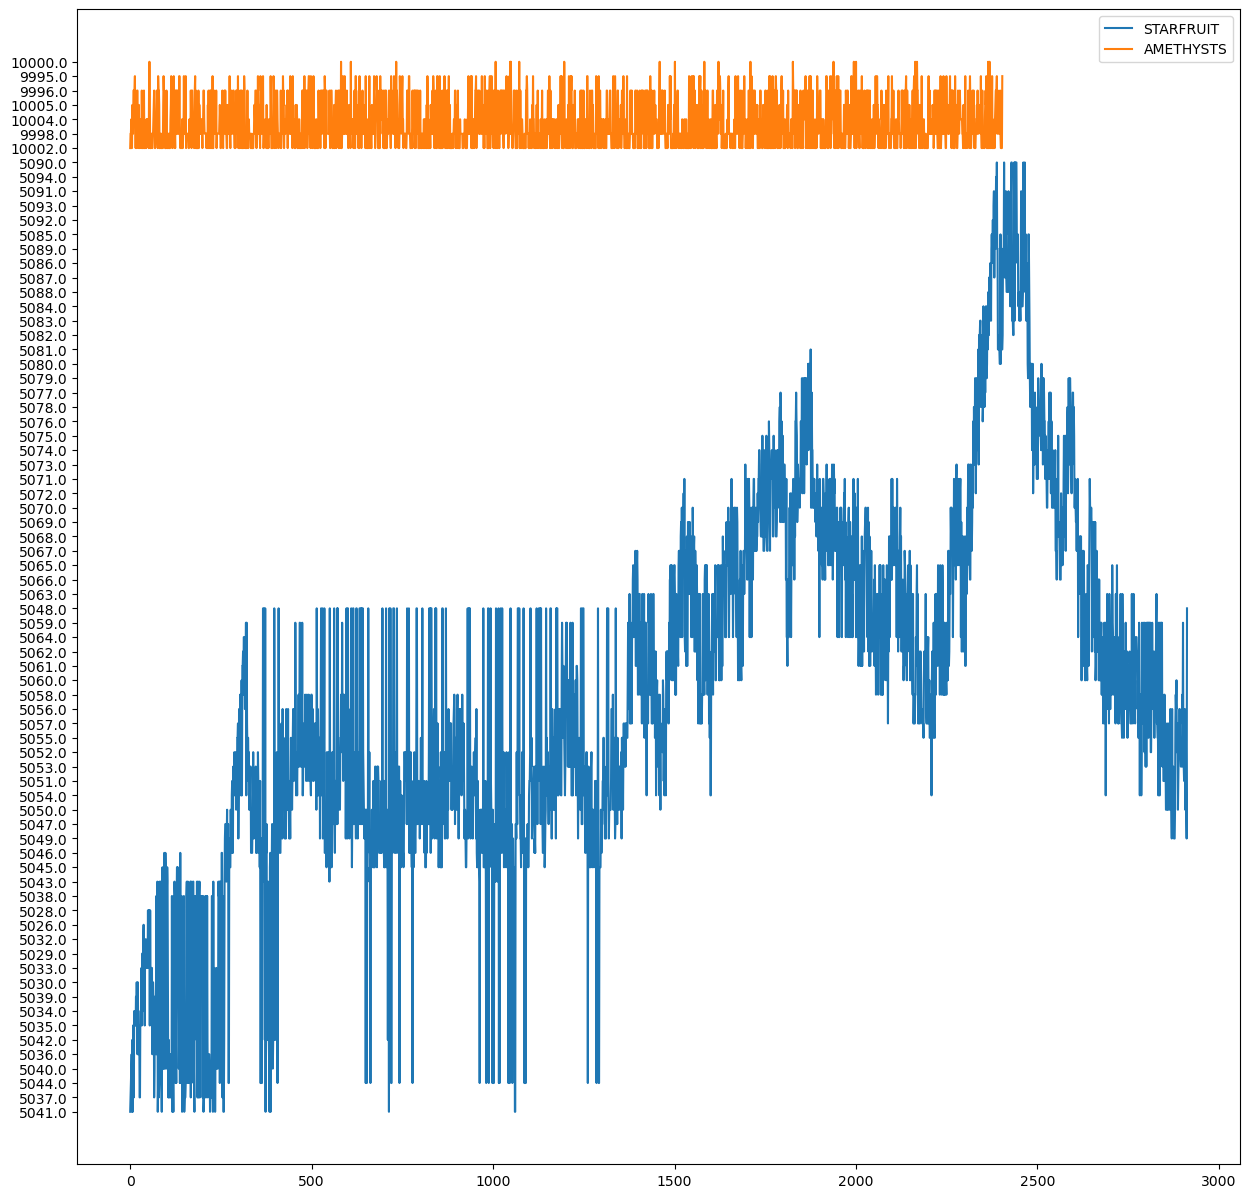

In [8]:
df1_s = df1[df1['symbol'] == 'STARFRUIT'].reset_index(drop=True)['price']
df1_a = df1[df1['symbol'] == 'AMETHYSTS'].reset_index(drop=True)['price']

plt.figure(figsize=(15, 15))
plt.plot(df1_s, label='STARFRUIT')
plt.plot(df1_a, label='AMETHYSTS')
plt.legend()
plt.show()

In [9]:
max_profit_s = np.absolute(np.array(df1_s.astype(float))[1:] - np.array(df1_s.astype(float))[:-1]).sum()
max_profit_s

8411.0

In [10]:
max_profit_a = np.absolute(np.array(df1_a.astype(float))[1:] - np.array(df1_a.astype(float))[:-1]).sum()
max_profit_a

7245.0

In [11]:
def calc_max_profits(filename):
    df = pd.read_csv(root + '/' + filename)
    cols = df.columns[0].split(';')
    df[df.columns[0]] = df[df.columns[0]].apply(allocate_cols)
    df = df[df.columns[0]].tolist()
    df = pd.DataFrame(df, columns=cols)
    df_s = df[df['symbol'] == 'STARFRUIT'].reset_index(drop=True)['price']
    df_a = df[df['symbol'] == 'AMETHYSTS'].reset_index(drop=True)['price']
    max_profit_s = np.absolute(np.array(df_s.astype(float))[1:] - np.array(df_s.astype(float))[:-1]).sum()
    max_profit_a = np.absolute(np.array(df_a.astype(float))[1:] - np.array(df_a.astype(float))[:-1]).sum()
    print('STARFRUIT MAX:', max_profit_s)
    print('AMETHYSYS MAX:', max_profit_a)

In [12]:
calc_max_profits('trades_round_1_day_-1_nn.csv')

STARFRUIT MAX: 8730.0
AMETHYSYS MAX: 7648.0


In [13]:
calc_max_profits('trades_round_1_day_-2_nn.csv')

STARFRUIT MAX: 8523.0
AMETHYSYS MAX: 7740.0


In [14]:
history = pd.read_csv('./trade_history1.csv')
cols = history.columns[0].split(';')
history[history.columns[0]] = history[history.columns[0]].apply(allocate_cols)
history = history[history.columns[0]].tolist()
history = pd.DataFrame(history, columns=cols)
history

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,9,9995,23,,,10005,23,,,,,10001.5,0.0
1,0,0,STARFRUIT,5036,23,,,,,5043,23,,,,,5039.5,0.0
2,0,100,AMETHYSTS,10002,1,10000,2,9998,4,10004,1,10005,21,,,10003.0,0.0
3,0,100,STARFRUIT,5042,1,5039,2,5037,1,5043,22,,,,,5042.5,0.0
4,0,200,AMETHYSTS,9996,1,9995,21,,,10004,1,10005,21,,,10000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,99700,AMETHYSTS,9995,26,,,,,10005,26,,,,,10000.0,826.0
1996,0,99800,AMETHYSTS,9996,1,9995,25,,,10002,5,10004,1,10005,25,9999.0,826.0
1997,0,99800,STARFRUIT,5051,1,5050,25,,,5057,26,,,,,5054.0,676.30859375
1998,0,99900,AMETHYSTS,9998,6,9996,1,9995,27,10004,1,10005,27,,,10001.0,826.0


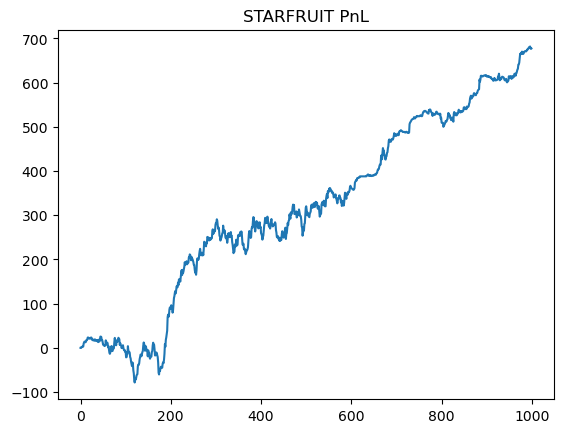

In [15]:
s_pnl = history[history['product'] == 'STARFRUIT'].reset_index(drop=True)['profit_and_loss'].astype(float)
a_pnl = history[history['product'] == 'AMETHYSTS'].reset_index(drop=True)['profit_and_loss'].astype(float)

plt.plot(s_pnl.apply(lambda x: round(x, 2)))
plt.title('STARFRUIT PnL')
plt.show()

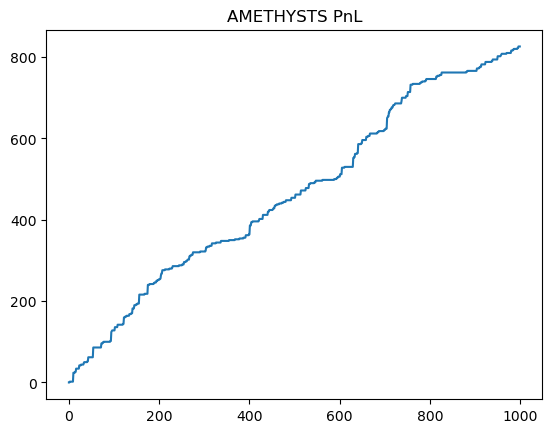

In [16]:
plt.plot(a_pnl.apply(lambda x: round(x, 2)))
plt.title('AMETHYSTS PnL')
plt.show()

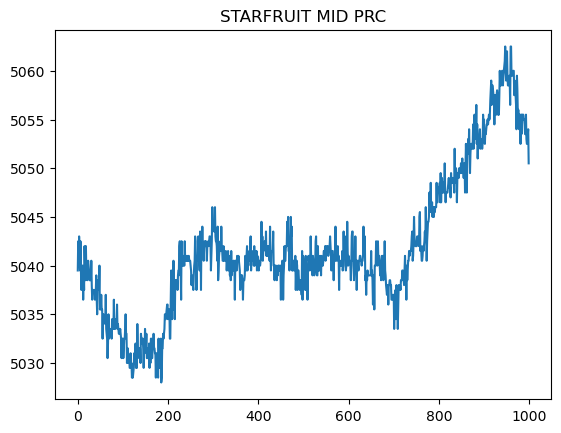

In [17]:
starfruit = history[history['product'] == 'STARFRUIT'].reset_index(drop=True)
amethysts = history[history['product'] == 'AMETHYSTS'].reset_index(drop=True)

plt.plot(starfruit['mid_price'].astype(float))
plt.title('STARFRUIT MID PRC')
plt.show()

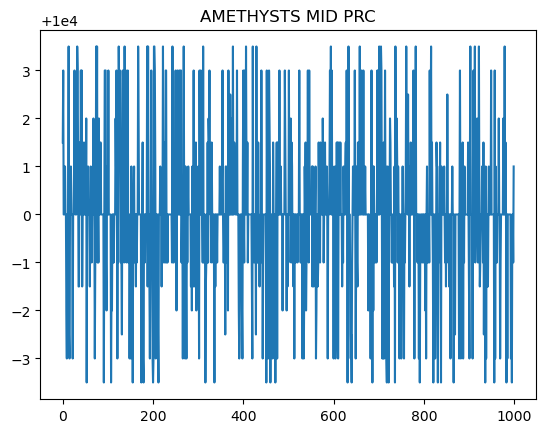

In [18]:
plt.plot(amethysts['mid_price'].astype(float))
plt.title('AMETHYSTS MID PRC')
plt.show()

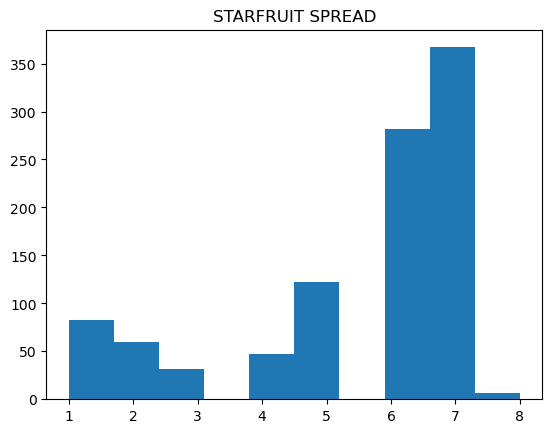

In [19]:
starfruit_spread = starfruit['ask_price_1'].astype(float) - starfruit['bid_price_1'].astype(float)
plt.hist(starfruit['ask_price_1'].astype(float) - starfruit['bid_price_1'].astype(float))
plt.title('STARFRUIT SPREAD')
plt.show()

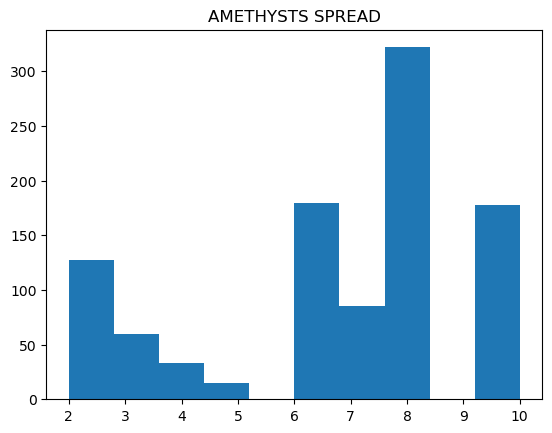

In [20]:
amethysts_spread = amethysts['ask_price_1'].astype(float) - amethysts['bid_price_1'].astype(float)
plt.hist(amethysts['ask_price_1'].astype(float) - amethysts['bid_price_1'].astype(float))
plt.title('AMETHYSTS SPREAD')
plt.show()

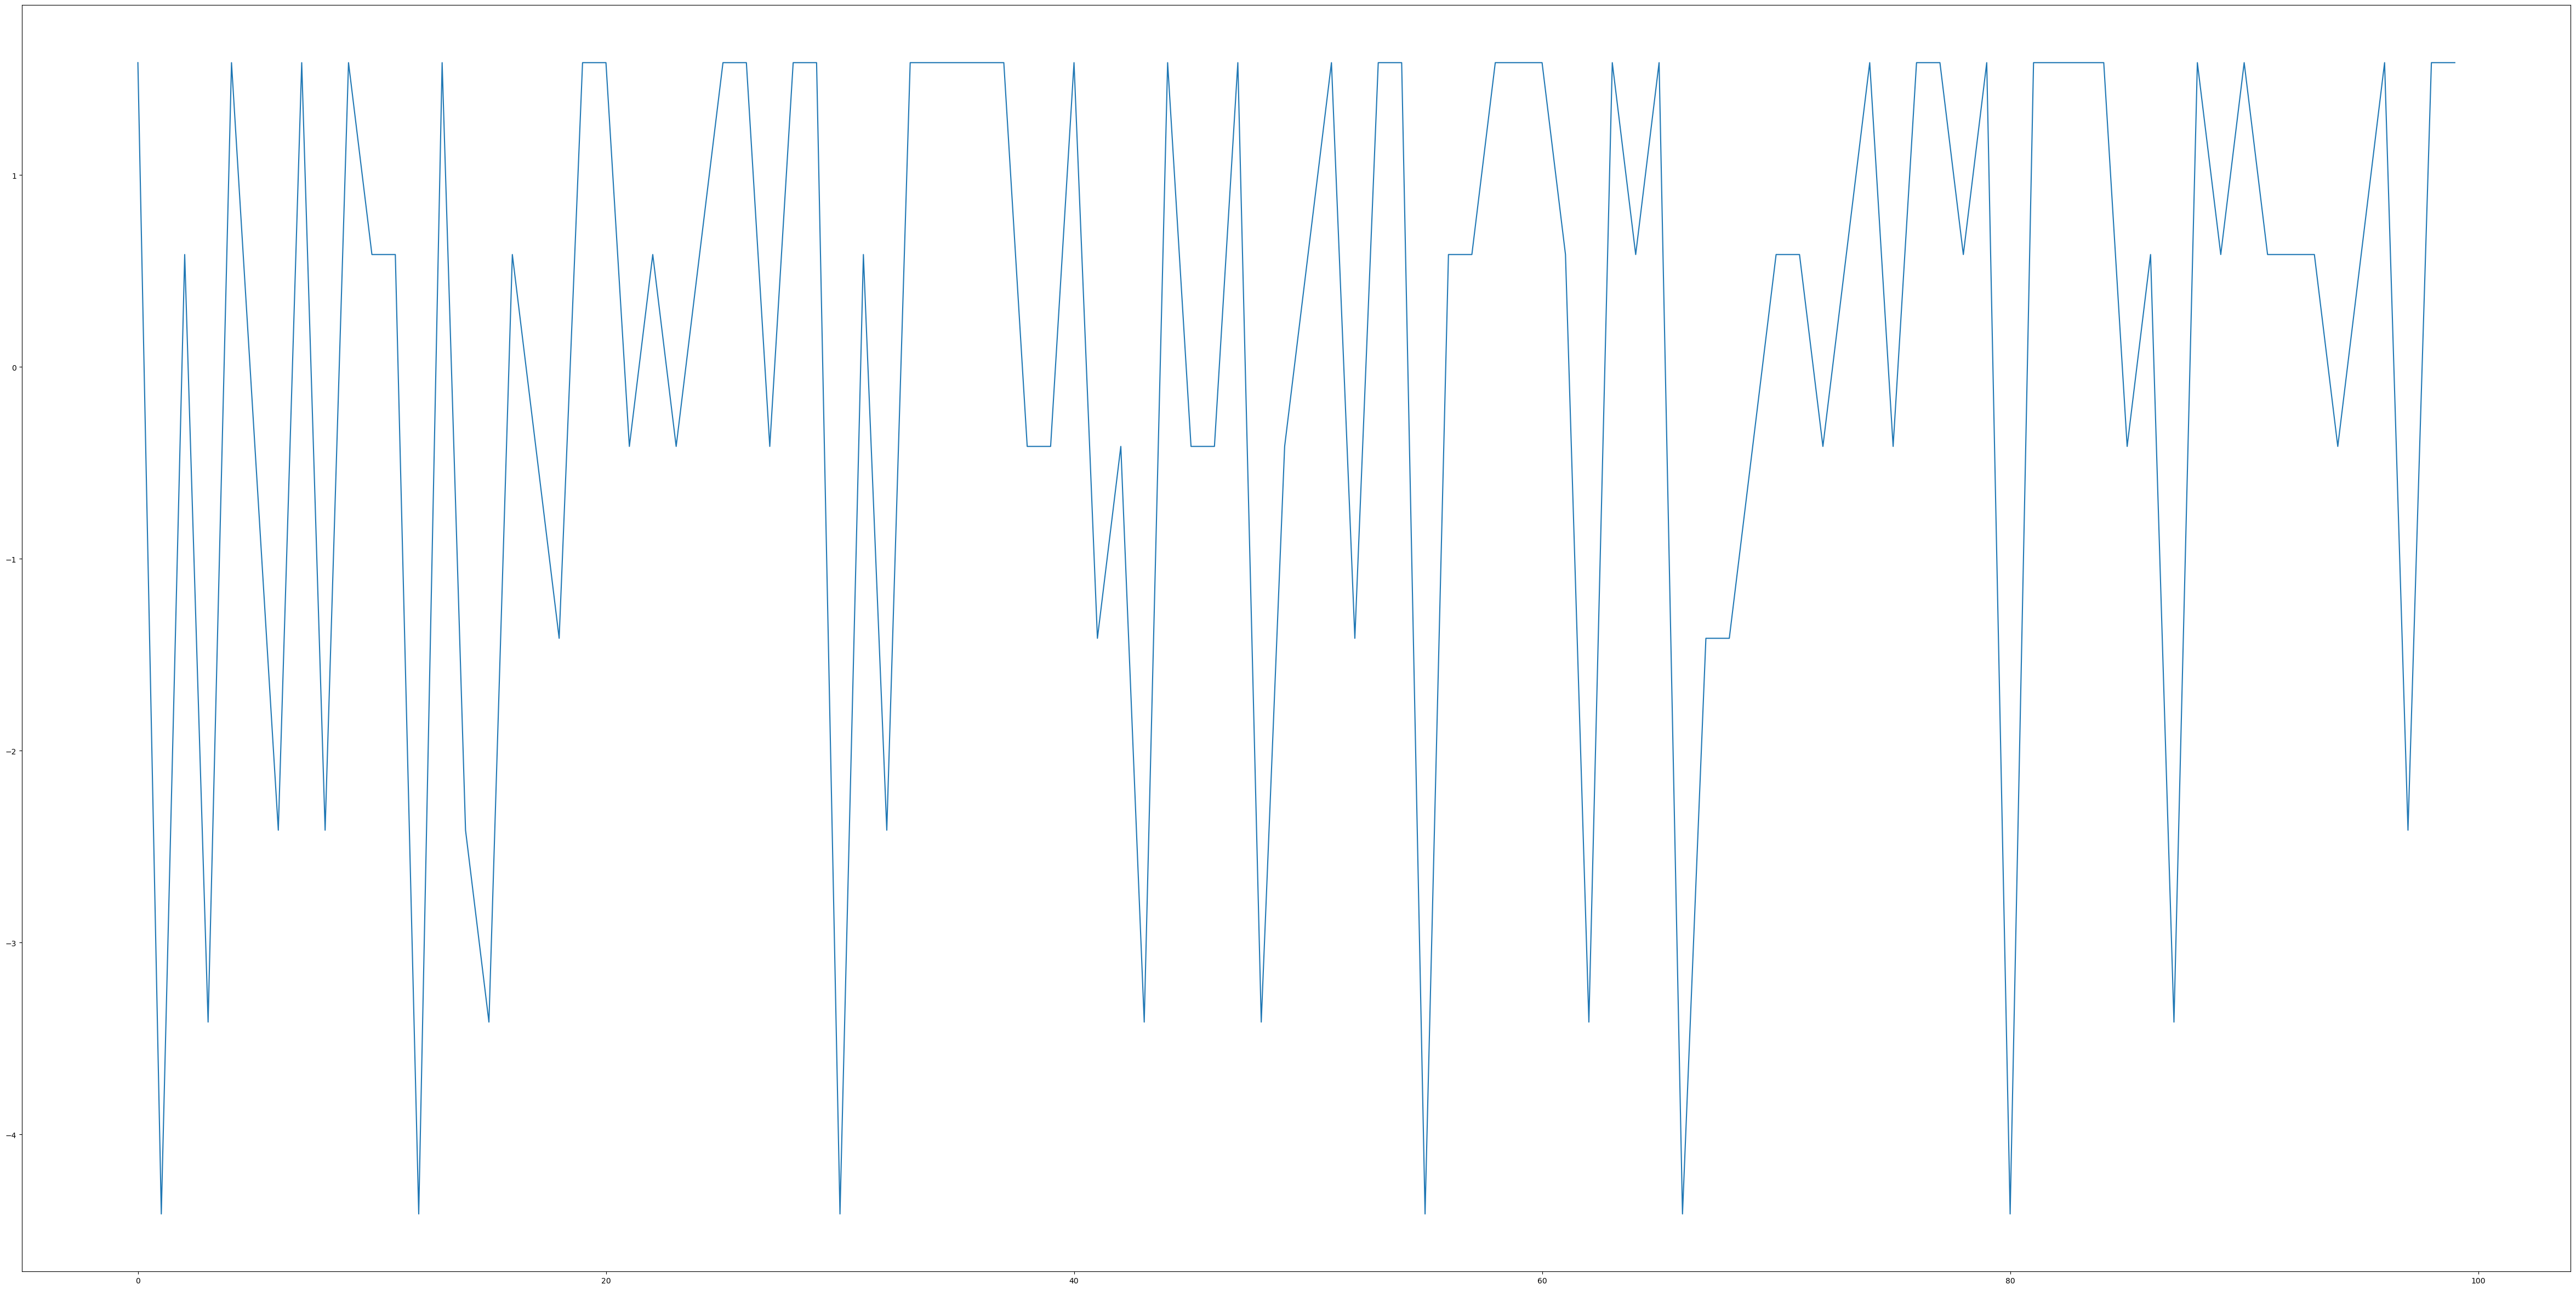

In [97]:
plt.figure(figsize=(60, 30))
plt.plot((starfruit_spread - starfruit_spread.mean())[:100])
plt.show()

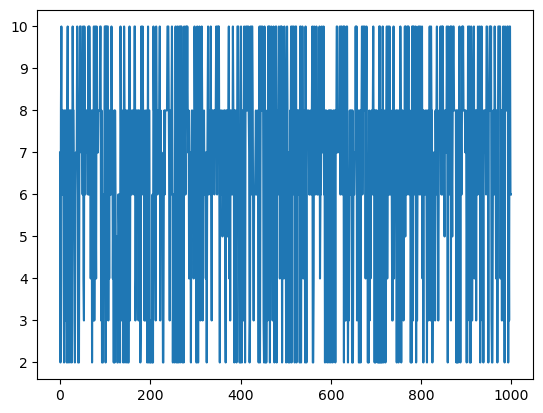

In [22]:
plt.plot(amethysts_spread)
plt.show()

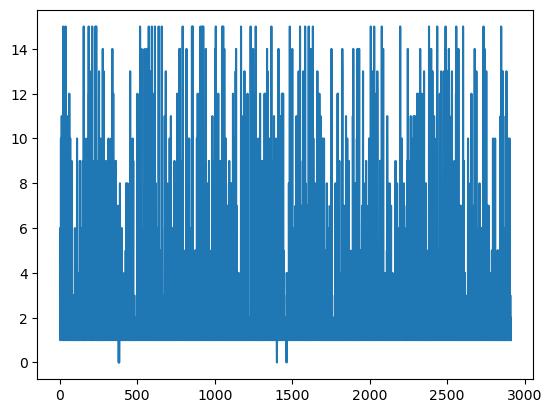

In [27]:
df1_s = df1[df1['symbol'] == 'STARFRUIT'].reset_index(drop=True)
plt.plot(df1_s['quantity'].astype(float))
plt.show()

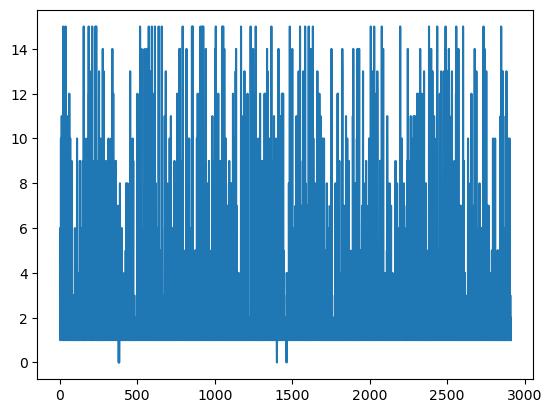

In [28]:
df1_a = df1[df1['symbol'] == 'AMETHYSTS'].reset_index(drop=True)
plt.plot(df1_s['quantity'].astype(float))
plt.show()

In [89]:
def allegro_scherzando(filename):
    df = pd.read_csv(root + '/' + filename)
    cols = df.columns[0].split(';')
    df[df.columns[0]] = df[df.columns[0]].apply(allocate_cols)
    df = df[df.columns[0]].tolist()
    df = pd.DataFrame(df, columns=cols)
    df_s = df[df['product'] == 'STARFRUIT'].reset_index(drop=True).drop(columns=['product']).replace('', '0').astype(float)
    df_a = df[df['product'] == 'AMETHYSTS'].reset_index(drop=True).drop(columns=['product']).replace('', '0').astype(float)
    accp_prc_s = df_s['bid_price_1']*df_s['bid_volume_1'] + df_s['bid_price_2']*df_s['bid_volume_2'] + df_s['bid_price_3']*df_s['bid_volume_3']
    accp_prc_s += df_s['ask_price_1']*df_s['ask_volume_1'] + df_s['ask_price_2']*df_s['ask_volume_2'] + df_s['ask_price_3']*df_s['ask_volume_3']
    accp_prc_s /= df_s['bid_volume_1'] + df_s['bid_volume_2'] + df_s['bid_volume_3'] + df_s['ask_volume_1'] + df_s['ask_volume_2'] + df_s['ask_volume_3']
    accp_prc_a = df_a['bid_price_1']*df_a['bid_volume_1'] + df_a['bid_price_2']*df_a['bid_volume_2'] + df_a['bid_price_3']*df_a['bid_volume_3']
    accp_prc_a += df_a['ask_price_1']*df_a['ask_volume_1'] + df_a['ask_price_2']*df_a['ask_volume_2'] + df_a['ask_price_3']*df_a['ask_volume_3']
    accp_prc_a /= df_a['bid_volume_1'] + df_a['bid_volume_2'] + df_a['bid_volume_3'] + df_a['ask_volume_1'] + df_a['ask_volume_2'] + df_a['ask_volume_3']
    
    #X_s = np.array(((accp_prc_s/df_s['mid_price'])-1).iloc[:-1])
    X_s = np.array(df_s['ask_price_1'] - df_s['bid_price_1'])[:-1]
    #y_s = np.array(df_s['mid_price'].pct_change().dropna())
    y_s = np.array(df_s['mid_price'][1:]) - np.array(df_s['mid_price'][:-1])
    
    #X_a = np.array(((accp_prc_a/df_a['mid_price'])-1).iloc[:-1])
    X_a = np.array(df_a['ask_price_1'] - df_a['bid_price_1'])[:-1]
    #y_a = np.array(df_a['mid_price'].pct_change().dropna())
    y_a = np.array(df_a['mid_price'][1:]) - np.array(df_a['mid_price'][:-1])
    
    #print('STARFRUIT Win ratio:', ((y_s[X_s > 0] > 0).sum() + (y_s[X_s < 0] < 0).sum())/(y_s != 0).sum())
    #print('AMETHYSTS Win ratio:', ((y_a[X_a > 0] > 0).sum() + (y_a[X_a < 0] < 0).sum())/(y_a != 0).sum())
    
    plt.scatter(X_s, y_s)
    plt.title('STARFRUIT mid chg vs spread chg')
    plt.show()
    
    plt.clf()
    
    plt.scatter(X_a, y_a)
    plt.title('AMETHYSTS mid chg vs spread chg')
    plt.show()

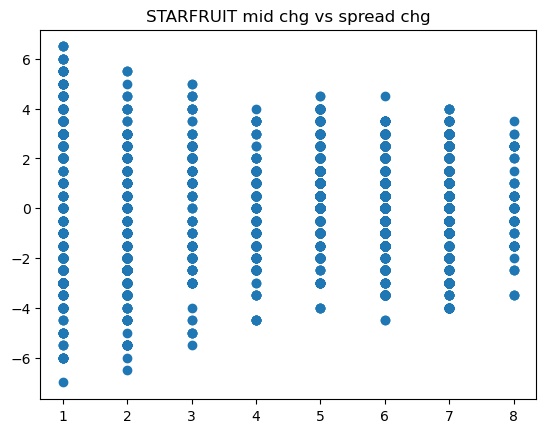

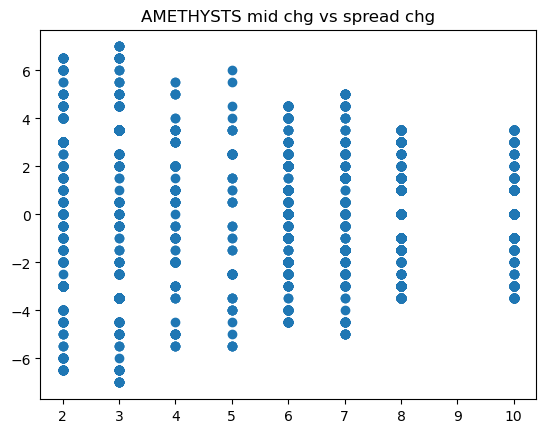

In [90]:
allegro_scherzando('prices_round_1_day_0.csv')

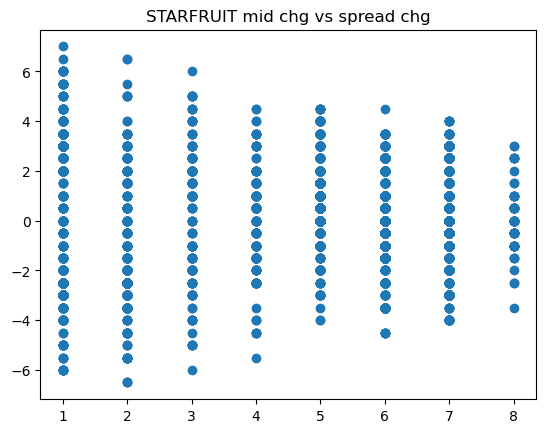

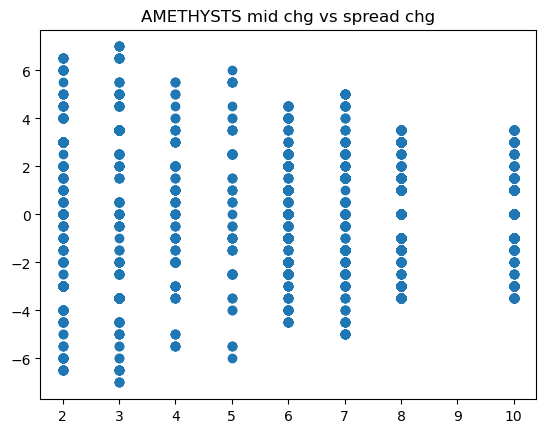

In [91]:
allegro_scherzando('prices_round_1_day_-1.csv')

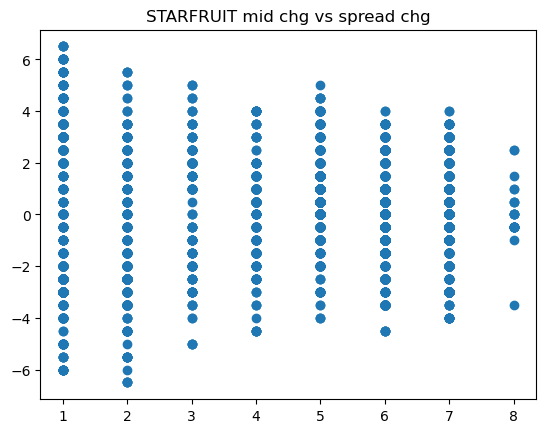

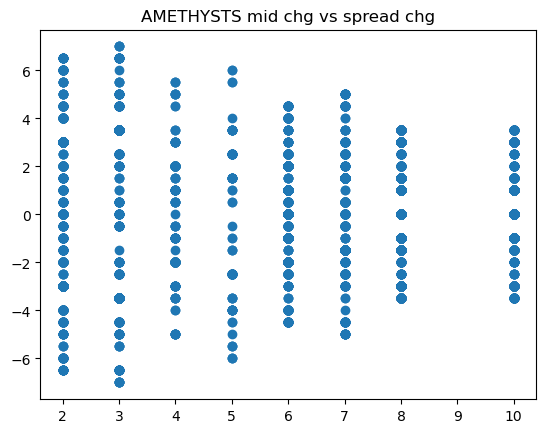

In [92]:
allegro_scherzando('prices_round_1_day_-2.csv')

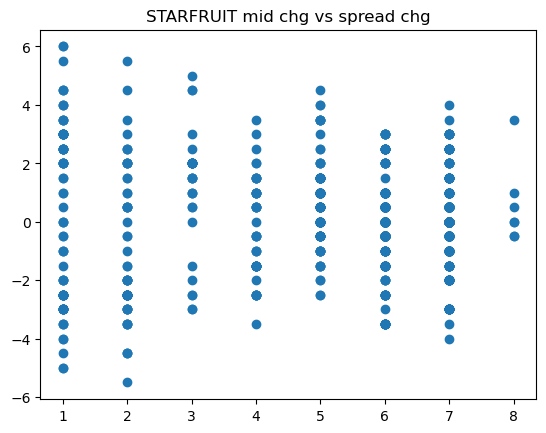

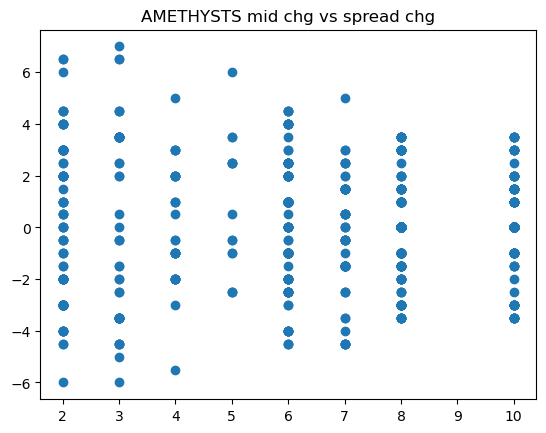

In [93]:
allegro_scherzando('trade_history1.csv')

In [37]:
s_pnl = history[history['product'] == 'STARFRUIT'].reset_index(drop=True)['profit_and_loss'].astype(float)
a_pnl = history[history['product'] == 'AMETHYSTS'].reset_index(drop=True)['profit_and_loss'].astype(float)

a_pnl_pct = a_pnl.pct_change().dropna()
len(a_pnl_pct[a_pnl_pct > 0])

165

In [38]:
len(a_pnl_pct[a_pnl_pct < 0])

0

In [39]:
s_pnl_pct = s_pnl.pct_change().dropna()
len(s_pnl_pct[s_pnl_pct > 0])

536

In [40]:
len(s_pnl_pct[s_pnl_pct < 0])

446

(array([  1.,   1.,   0.,   0.,   3.,   1.,   6.,   6.,   9., 419.]),
 array([-5.02325581e+00, -4.52093800e+00, -4.01862018e+00, -3.51630237e+00,
        -3.01398456e+00, -2.51166674e+00, -2.00934893e+00, -1.50703111e+00,
        -1.00471330e+00, -5.02395482e-01, -7.76668867e-05]),
 <BarContainer object of 10 artists>)

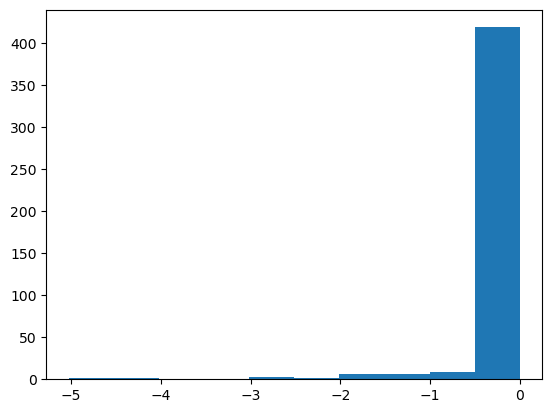

In [42]:
plt.hist(s_pnl_pct[s_pnl_pct < 0])

(array([529.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([2.40561470e-05, 3.27335498e+00, 6.54668591e+00, 9.82001684e+00,
        1.30933478e+01, 1.63666787e+01, 1.96400096e+01, 2.29133406e+01,
        2.61866715e+01, 2.94600024e+01, 3.27333333e+01]),
 <BarContainer object of 10 artists>)

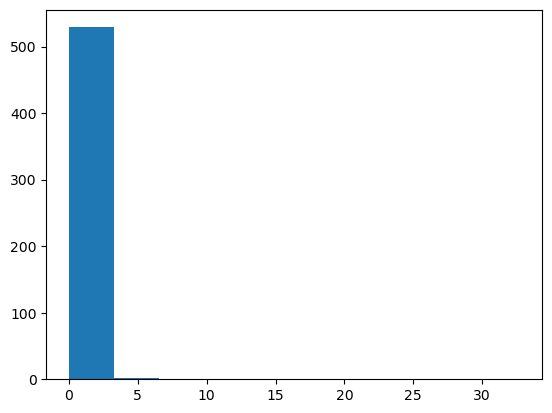

In [44]:
plt.hist(s_pnl_pct[s_pnl_pct > 0][2:])

(array([995.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

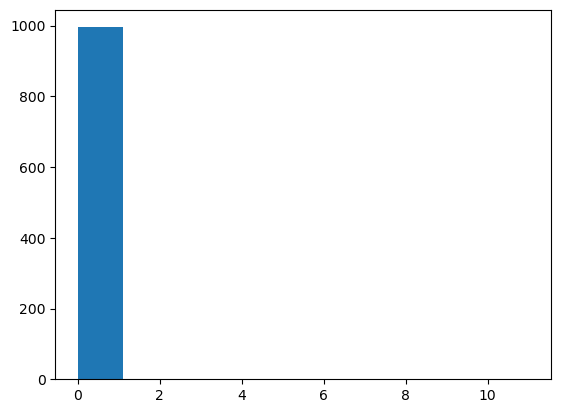

In [71]:
plt.hist(a_pnl_pct[a_pnl_pct >= 0][2:])

In [2]:
!pip install jsonpickle

  Obtaining dependency information for jsonpickle from https://files.pythonhosted.org/packages/d6/be/c11f919e02622f15b942c0f2867dff6c3836ce32cd617627dda73bc9e5b7/jsonpickle-3.0.3-py3-none-any.whl.metadata
  Using cached jsonpickle-3.0.3-py3-none-any.whl.metadata (7.3 kB)
Using cached jsonpickle-3.0.3-py3-none-any.whl (40 kB)


In [3]:
import jsonpickle

traderData = ""
encoded = jsonpickle.encode(traderData)
encoded

'""'

In [4]:
decoded = jsonpickle.decode(encoded)
decoded

''

In [5]:
traderData = {'mid_price':[]}
encoded = jsonpickle.encode(traderData)
encoded

'{"mid_price": []}'

In [6]:
decoded = jsonpickle.decode(encoded)
decoded

{'mid_price': []}

In [7]:
decoded['mid_price'].append(100)
encoded = jsonpickle.encode(decoded)
encoded

'{"mid_price": [100]}'

In [8]:
decoded = jsonpickle.decode(encoded)
decoded

{'mid_price': [100]}

In [10]:
900+(100**3)/15000

966.6666666666666

In [11]:
566**0.5

23.790754506740637